In [36]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib import pylab
import numpy as np
import scipy

### 【問題1】データセットの取得
pd.read_csv()を使用して、変数に格納してください。

In [17]:
df_train = pd.read_csv("train.csv")

### 【問題2】データセット自体の調査
KaggleのOverviewページや、Dataページの「Data fields」などを読みながら、どのようなデータセットかを説明してください。

###### 説明
アイオワ州エイムズの住宅の側面を説明する79の特徴量を使い、各住宅の最終価格を予測する為のコンペ。
以下のような特徴量を使い、最終価格を予測する。

- SalePrice - 施設の売却価格（ドル）。予測しようとしているターゲット変数。
- MSSubClass：建物クラス
- MSゾーニング：一般的なゾーニング分類
- LotFrontage：不動産に接続されている通りの直線フィート
- LotArea：ロットサイズ（平方フィート）
- 通り：道路アクセスの種類
- 路地：路地アクセスの種類

### 【問題3】データの確認
データを確認していきます。コードとマークダウンを組み合わせてレポートしてください。

- 各特徴量がどういったものかを見る。（数値データか文字データなど）
- 今回の目的変数はどの列か確認する。
- 特徴量の平均値と標準偏差、四分位数を一度に表示させる。

In [18]:
##############データの確認####################
print("キーの確認: \n{}" .format(df_train.keys()))
print("各データ内容: {}" .format(df_train['SalePrice'].head()))
# print(train_data['DESCR'][:193] + "\n...")
# print("Feature names: {}" .format(train_data['feature_names']))
# print("First five columns of target: {}" .format(train_data['target'][:5]))
# print("Filename: {}" .format(train_data['filename']))
# print("Target names: {}" .format(train_data['target_names']))

キーの確認: 
Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'Pa

In [19]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### 【問題4】欠損値への対応
欠損値に関して以下のことを行い、レポートしてください。

各特徴量の欠損値の有無を確認する。
欠損値の確認にはmissingnoというライブラリを活用しましょう。このライブラリにより欠損値の有無が可視化できます。インストールや使い方に関しては以下のページをご覧ください。

ResidentMario/missingno: Missing data visualization module for Python.

- 欠損値が何パーセント含まれるかを確認する。
- 5つ以上欠損値がある特徴量（列）は削除する。
- 欠損値があるサンプル（行）は削除する。

In [20]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [13]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [14]:
import missingno as msno

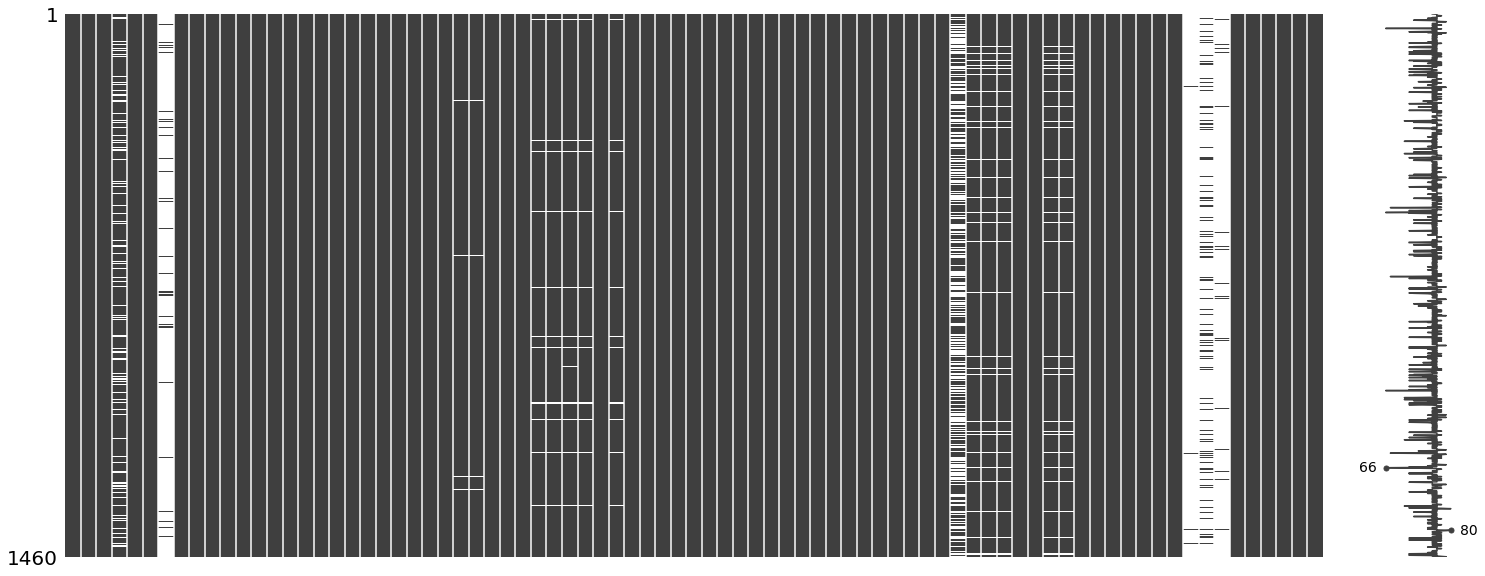

In [21]:
msno.matrix(df_train)

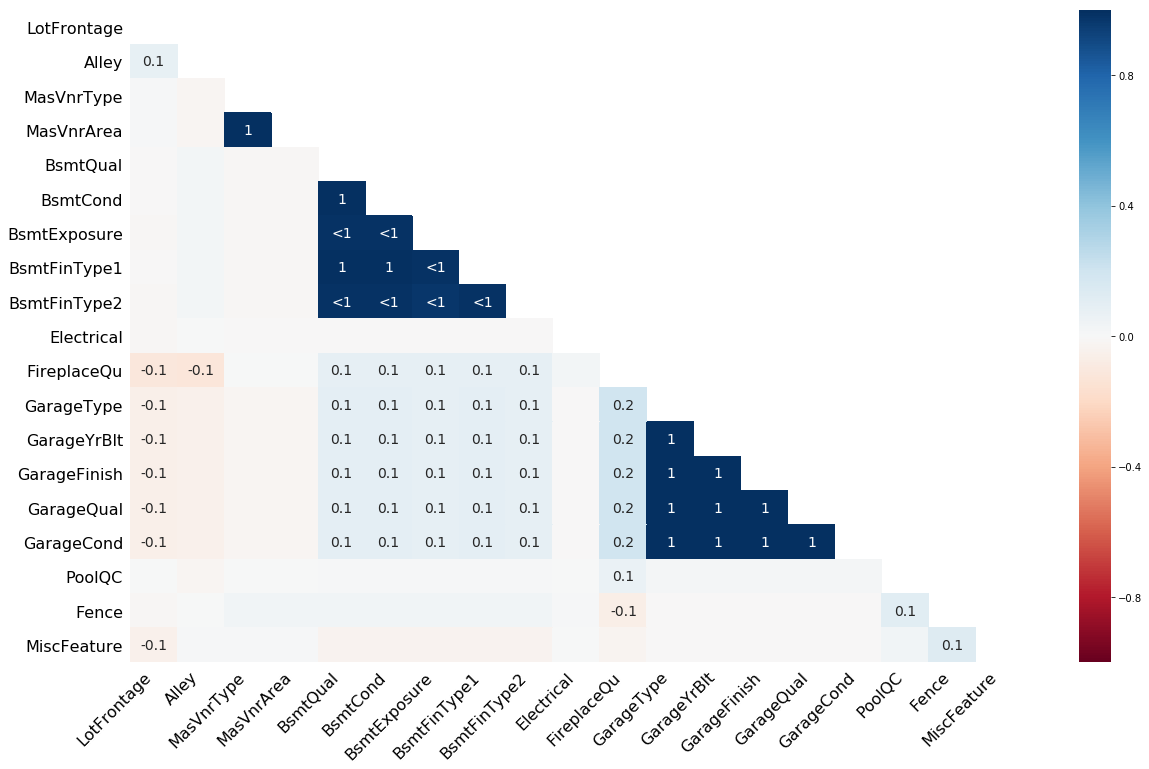

In [22]:
msno.heatmap(df_train)

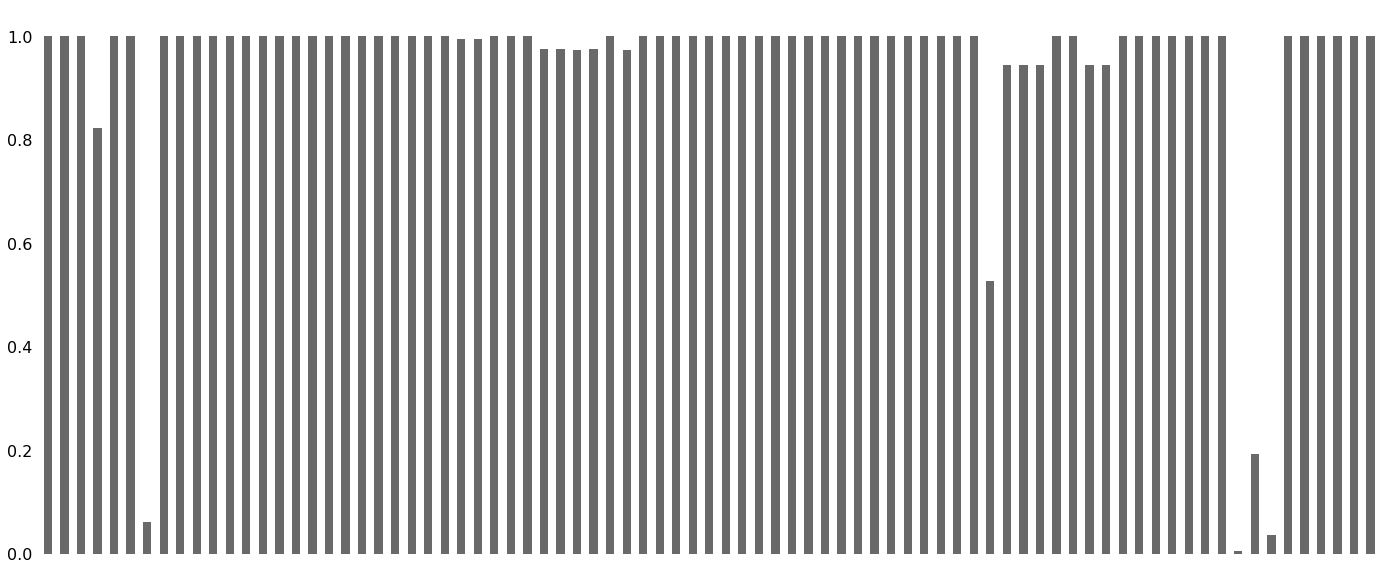

In [24]:
msno.bar(df_train)

In [23]:
df_train.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

In [27]:
df_train.isnull().apply(lambda col: col.value_counts(), axis=0).fillna(0).astype(np.int)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
False,1460,1460,1460,1201,1460,1460,91,1460,1460,1460,...,1460,7,281,54,1460,1460,1460,1460,1460,1460
True,0,0,0,259,0,0,1369,0,0,0,...,0,1453,1179,1406,0,0,0,0,0,0


In [28]:
df_train.isnull().apply(lambda col: col.value_counts(), axis=0).fillna(0).astype(np.float).apply(lambda col: col/col.sum(), axis=0)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
False,1.0,1.0,1.0,0.822603,1.0,1.0,0.062329,1.0,1.0,1.0,...,1.0,0.004795,0.192466,0.036986,1.0,1.0,1.0,1.0,1.0,1.0
True,0.0,0.0,0.0,0.177397,0.0,0.0,0.937671,0.0,0.0,0.0,...,0.0,0.995205,0.807534,0.963014,0.0,0.0,0.0,0.0,0.0,0.0


#### 【欠損値カウント参考】
https://qiita.com/hassaku_63/items/2c2c2cb01901bbffec0b

In [30]:
df_drop_train = df_train.dropna(axis = 'columns') # 欠損値がある特徴量（列）の削除

In [31]:
df_drop_train.isnull().apply(lambda col: col.value_counts(), axis=0).fillna(0).astype(np.int)

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
False,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,...,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460


In [32]:
df_drop_train = df_drop_train.dropna() # 欠損値があるサンプル（行）の削除

In [33]:
df_drop_train.isnull().apply(lambda col: col.value_counts(), axis=0).fillna(0).astype(np.int)

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
False,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,...,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460


### 【問題5】用語の調査
以下の２つの単語を知る必要があります。これらを調査してまとめてください。

- 尖度
- 歪度

#### 説明
- 尖度（せんど）とは
分布が正規分布からどれだけ尖っているかを表す統計量で、山の尖り度と裾の広がり度を示す。
正規分布より尖った分布（データが平均付近に集中し、分布の裾が重い）の時には正の値を、正規分布より扁平な分布（データが平均付近から散らばり、分布の裾が軽い）の時には負の値を取る。正規分布の場合には0になる。

- 歪度（わいど）
分布が正規分布からどれだけ歪んでいるかを表す統計量で、左右対称性を示す指標のこと。
「右裾が長い」もしくは「右に歪んだ」もしくは「左に偏った」分布のときには正の値を、「左裾が長い」もしくは「左に歪んだ」もしくは「右に偏った」分布のときには負の値を取る。左右対称の分布（例えば正規分布）の場合には0になる。

### 【問題6】分布の確認
- seabornのsns.distplot()を使い目的変数の分布を表示し、「尖度」と「歪度」も算出する。
- 目的変数に対して対数変換を行う。
- 対数変換したものに対して分布を表示し、「尖度」と「歪度」も算出する。

対数変換の前後での変化を「正規分布」という言葉を含めて説明してください。このように加工することで予測時の精度を上げることができます。

seaborn.distplot — seaborn 0.9.0 documentation

歪度：1.880940746034036
尖度：6.509812011089439


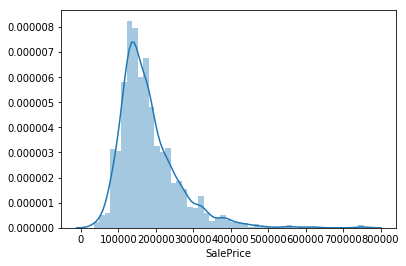

In [40]:
print("歪度：{}".format(scipy.stats.skew(df_drop_train.SalePrice)))
print("尖度：{}".format(scipy.stats.kurtosis(df_drop_train.SalePrice)))
sns.distplot(df_drop_train.SalePrice, kde = True)
plt.show()

In [44]:
df_log_train = np.log(df_drop_train.SalePrice) # 対数変換
# df_log_train.head()

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: SalePrice, dtype: float64

歪度：0.1212103673013655
尖度：0.8026555069117713


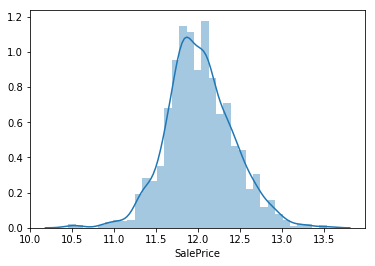

In [46]:
print("歪度：{}".format(scipy.stats.skew(df_log_train)))
print("尖度：{}".format(scipy.stats.kurtosis(df_log_train)))
sns.distplot(df_log_train, kde = True)
plt.show()

#### 説明
対数変換（logarithmic transformation）は、対数正規分布に従う変数の対数をとり、正規分布に従う変数を作ること。対数正規分布においては、標準偏差は平均値に比例するので正規分布と等分散性を仮定する一元配置分散分析などにおいては対数変換を行った変数を使用したほうが良い。

正規分布（normal distribution）は、平均値の付近に集積するようなデータの分布を表した連続的な変数に関する確率分布のこと。正規分布は統計学や自然科学、社会科学の様々な場面で複雑な現象を簡単に表すモデルとして用いられている。たとえば実験における測定の誤差は正規分布に従って分布すると仮定され、不確かさの評価が計算されている。

### 【問題7】相関係数の確認
特徴量の確認をしていきます。それぞれに対してマークダウンで説明や考察を書いてください。

- 相関係数行列のヒートマップを作り、相関係数の高い関係を見つける。
- 目的変数との相関の高い特徴量10個を選び、これらだけの相関係数行列ヒートマップを作る。
- 選んだ10個の特徴量が何か表しているかをKaggleのDataDescriptionの記述を参考に日本語でまとめる。
- 選んだ10個の特徴量の中でお互いの相関係数が高い組み合わせを3つ探し出す。

#### 補足
重回帰分析などで予測する場合、相関が高すぎる特徴量の組み合わせがあると予測に悪影響が出ることがあります。このような場合の簡単な対処方法として、そういった特徴量の組みを探し出して、１つに絞るということがあります。

In [52]:
df_corr_train = df_drop_train.corr(method="pearson") # 相関係数行列を作成
# df_corr_train

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.005024,-0.005968,-0.007940,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.139781,0.032628,-0.059316,0.027850,0.040581,-0.069836,-0.065649,-0.140759,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotArea,-0.033226,-0.139781,1.000000,0.105806,-0.005636,0.014228,0.013788,0.214103,0.111170,-0.002618,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.105806,1.000000,-0.091932,0.572323,0.550684,0.239666,-0.059119,0.308159,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.046231,0.040229,-0.136841,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.014228,0.572323,-0.375983,1.000000,0.592855,0.249503,-0.049107,0.149040,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.013788,0.550684,0.073741,0.592855,1.000000,0.128451,-0.067759,0.181133,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
BsmtFinSF1,-0.005024,-0.069836,0.214103,0.239666,-0.046231,0.249503,0.128451,1.000000,-0.050117,-0.495251,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.005968,-0.065649,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.050117,1.000000,-0.209294,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378
BsmtUnfSF,-0.007940,-0.140759,-0.002618,0.308159,-0.136841,0.149040,0.181133,-0.495251,-0.209294,1.000000,...,-0.005316,0.129005,-0.002538,0.020764,-0.012579,-0.035092,-0.023837,0.034888,-0.041258,0.214479


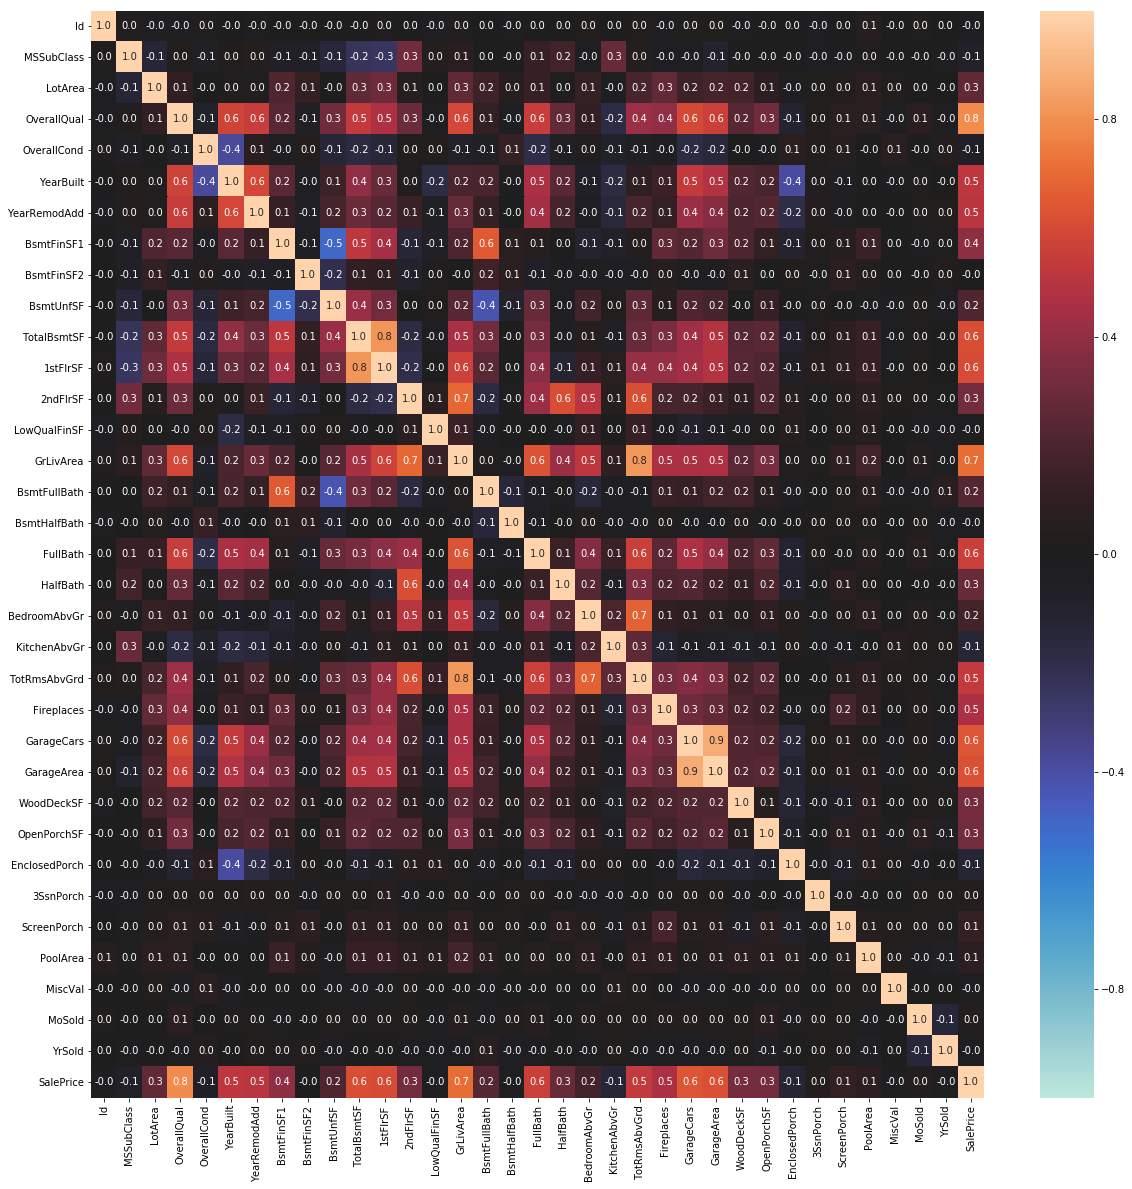

In [63]:
plt.figure(figsize=(20,20))
sns.heatmap(df_corr_train,
            vmin = -1.0,
            vmax = 1.0,
            center = 0,
            fmt = '.1f',
            annot = True, # True:格子の中に値を表示
            xticklabels = df_corr_train.columns.values,
            yticklabels = df_corr_train.columns.values, 
           )
plt.show()

#### 相関係数の高い関係
- TotalBsmtSF：地下室の総平方フィート
- 1stFlrSF：1階（平方フィート）


- GarageCars：自動車容量のガレージサイズ
- GarageArea：ガレージサイズ（平方フィート）

In [82]:
# 目的変数との相関の高い特徴量順にソート（降順）
df_corr_train.sort_values(by=["SalePrice"], ascending=False)

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
SalePrice,-0.021917,-0.084284,0.263843,0.790982,-0.077856,0.522897,0.507101,0.386420,-0.011378,0.214479,...,0.324413,0.315856,-0.128578,0.044584,0.111447,0.092404,-0.021190,0.046432,-0.028923,1.000000
OverallQual,-0.028365,0.032628,0.105806,1.000000,-0.091932,0.572323,0.550684,0.239666,-0.059119,0.308159,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
GrLivArea,0.008273,0.074853,0.263116,0.593007,-0.079686,0.199010,0.287389,0.208171,-0.009640,0.240257,...,0.247433,0.330224,0.009113,0.020643,0.101510,0.170205,-0.002416,0.050240,-0.036526,0.708624
GarageCars,0.016570,-0.040110,0.154871,0.600671,-0.185758,0.537850,0.420622,0.224054,-0.038264,0.214175,...,0.226342,0.213569,-0.151434,0.035765,0.050494,0.020934,-0.043080,0.040522,-0.039117,0.640409
GarageArea,0.017634,-0.098672,0.180403,0.562022,-0.151521,0.478954,0.371600,0.296970,-0.018227,0.183303,...,0.224666,0.241435,-0.121777,0.035087,0.051412,0.061047,-0.027400,0.027974,-0.027378,0.623431
TotalBsmtSF,-0.015415,-0.238518,0.260833,0.537808,-0.171098,0.391452,0.291066,0.522396,0.104810,0.415360,...,0.232019,0.247264,-0.095478,0.037384,0.084489,0.126053,-0.018479,0.013196,-0.014969,0.613581
1stFlrSF,0.010496,-0.251758,0.299475,0.476224,-0.144203,0.281986,0.240379,0.445863,0.097117,0.317987,...,0.235459,0.211671,-0.065292,0.056104,0.088758,0.131525,-0.021096,0.031372,-0.013604,0.605852
FullBath,0.005587,0.131608,0.126031,0.550600,-0.194149,0.468271,0.439046,0.058543,-0.076444,0.288886,...,0.187703,0.259977,-0.115093,0.035353,-0.008106,0.049604,-0.014290,0.055872,-0.019669,0.560664
TotRmsAbvGrd,0.027239,0.040380,0.190015,0.427452,-0.057583,0.095589,0.191740,0.044316,-0.035227,0.250647,...,0.165984,0.234192,0.004151,-0.006683,0.059383,0.083757,0.024763,0.036907,-0.034516,0.533723
YearBuilt,-0.012713,0.027850,0.014228,0.572323,-0.375983,1.000000,0.592855,0.249503,-0.049107,0.149040,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897


上記ソートより、目的変数と相関の高い特徴量10個を抽出。

- OverallQual
- GrLivArea
- GarageCars
- GarageArea
- TotalBsmtSF
- 1stFlrSF
- FullBath
- TotRmsAbvGrd
- YearBuilt
- YearRemodAdd	

In [89]:
# 抽出した説明変数と目的変数の相関係数行列を作成する
label = ["OverallQual", "GrLivArea", "GarageCars", "GarageArea", "TotalBsmtSF", "1stFlrSF","FullBath", "TotRmsAbvGrd", "YearBuilt", "YearRemodAdd", "SalePrice"]
df_corr_sort = df[label].corr()
df_corr_sort

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,SalePrice
OverallQual,1.000000,0.593007,0.600671,0.562022,0.537808,0.476224,0.550600,0.427452,0.572323,0.550684,0.790982
GrLivArea,0.593007,1.000000,0.467247,0.468997,0.454868,0.566024,0.630012,0.825489,0.199010,0.287389,0.708624
GarageCars,0.600671,0.467247,1.000000,0.882475,0.434585,0.439317,0.469672,0.362289,0.537850,0.420622,0.640409
GarageArea,0.562022,0.468997,0.882475,1.000000,0.486665,0.489782,0.405656,0.337822,0.478954,0.371600,0.623431
TotalBsmtSF,0.537808,0.454868,0.434585,0.486665,1.000000,0.819530,0.323722,0.285573,0.391452,0.291066,0.613581
1stFlrSF,0.476224,0.566024,0.439317,0.489782,0.819530,1.000000,0.380637,0.409516,0.281986,0.240379,0.605852
FullBath,0.550600,0.630012,0.469672,0.405656,0.323722,0.380637,1.000000,0.554784,0.468271,0.439046,0.560664
TotRmsAbvGrd,0.427452,0.825489,0.362289,0.337822,0.285573,0.409516,0.554784,1.000000,0.095589,0.191740,0.533723
YearBuilt,0.572323,0.199010,0.537850,0.478954,0.391452,0.281986,0.468271,0.095589,1.000000,0.592855,0.522897
YearRemodAdd,0.550684,0.287389,0.420622,0.371600,0.291066,0.240379,0.439046,0.191740,0.592855,1.000000,0.507101


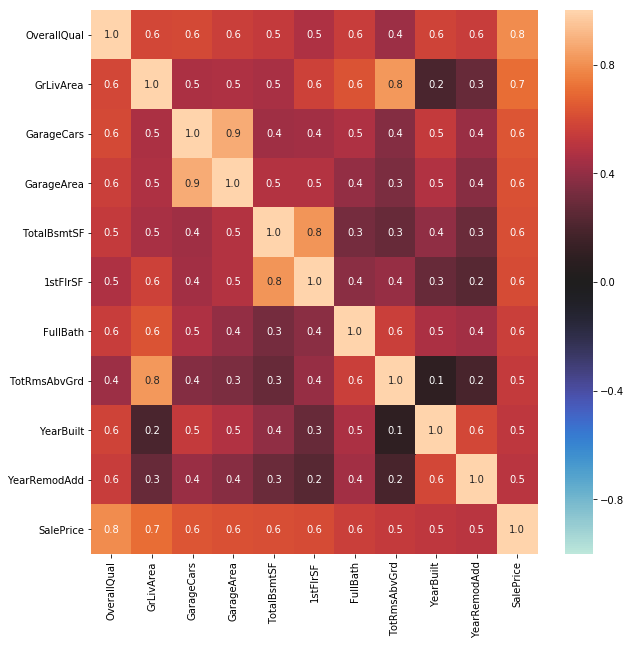

In [90]:
plt.figure(figsize=(10,10))
sns.heatmap(df_corr_sort,
            vmin = -1.0,
            vmax = 1.0,
            center = 0,
            fmt = '.1f',
            annot = True, # True:格子の中に値を表示
            xticklabels = df_corr_sort.columns.values,
            yticklabels = df_corr_sort.columns.values, 
           )
plt.show()

#### 目的変数と相関の高い特徴量10個についての説明。

- OverallQual：全体的な素材と仕上げの品質
- GrLivArea：上階（地面）のリビングエリア平方フィート
- GarageCars：自動車容量のガレージサイズ
- GarageArea：ガレージサイズ（平方フィート）
- TotalBsmtSF：地下室の総平方フィート
- 1stFlrSF：1階（平方フィート）
- FullBath：グレード以上のフルバスルーム
- TotRmsAbvGrd：グレード以上の総客室数（バスルームは含まず）
- YearBuilt：元の建設日
- YearRemodAdd：改造日

#### 選んだ10個の特徴量の中でお互いの相関係数が高い組み合わせ3つ。

- 「GarageCars」と「GarageArea」
- 「TotalBsmtSF」と「1stFlrSF」
- 「GrLivArea」と「TotRmsAbvGrd」